In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-05-30 04:38:51--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  19.5MB/s    in 8.8s    

2023-05-30 04:39:00 (16.2 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:


import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()



import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')



In [3]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse10-5.png', 'horse21-9.png', 'horse48-0.png', 'horse08-8.png', 'horse41-4.png', 'horse17-6.png', 'horse28-8.png', 'horse31-5.png', 'horse24-8.png', 'horse24-0.png']
['human16-27.png', 'human10-30.png', 'human17-26.png', 'human17-29.png', 'human01-08.png', 'human17-03.png', 'human05-24.png', 'human02-03.png', 'human16-26.png', 'human08-19.png']


In [4]:
print(len(os.listdir(train_horse_dir)))
print(len(os.listdir(train_human_dir)))

500
527


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as  mpimg
nrows , ncols = 4,4
pic_index = 0


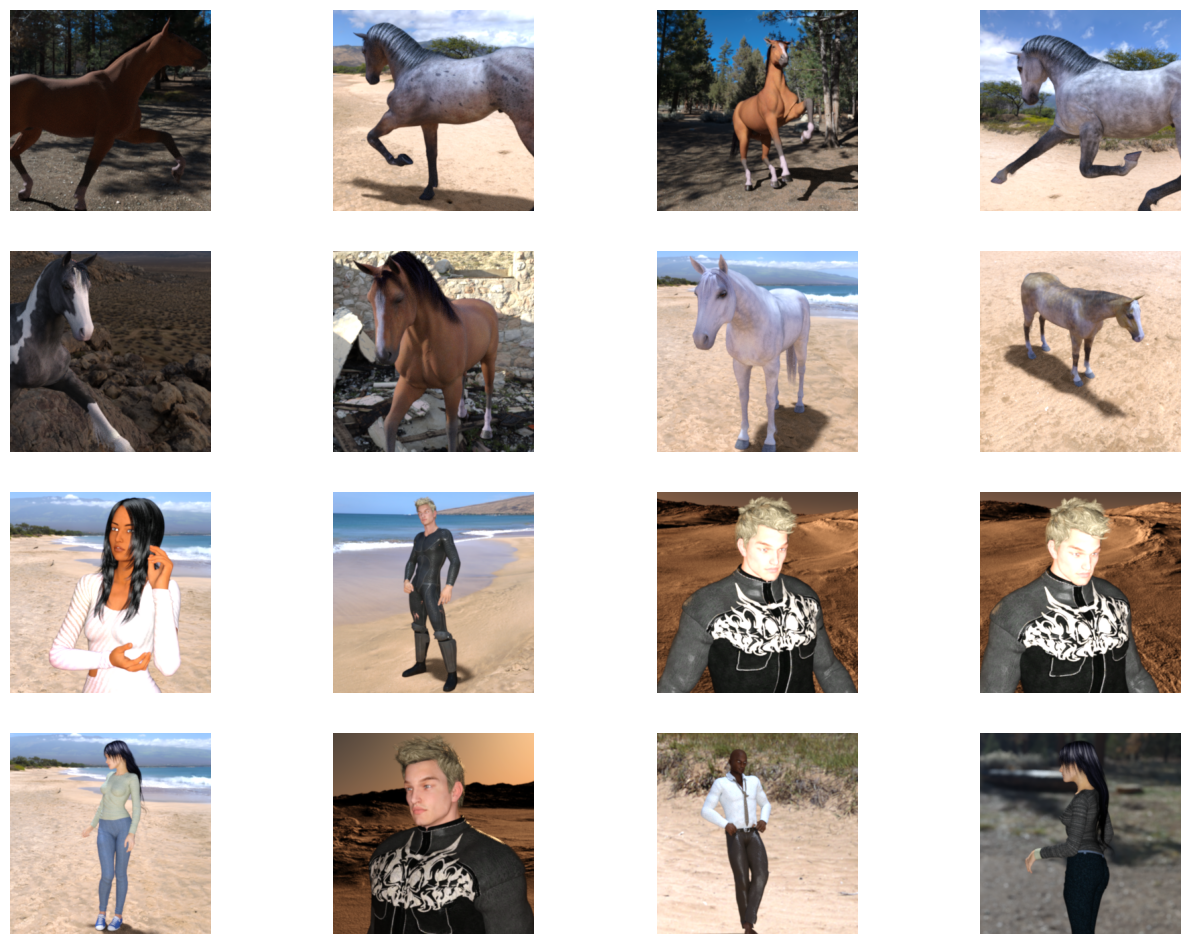

In [6]:
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*3)
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:


import tensorflow as tf



In [8]:


m = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [9]:


from tensorflow.keras.optimizers import RMSprop

m.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])



In [10]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = "nearest",
                                   )

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')



Found 1027 images belonging to 2 classes.


In [11]:
history = m.fit(train_generator,steps_per_epoch=8,epochs=15,verbose=1)

Epoch 1/15
8/8 [==============================] - 38s 4s/step - loss: 0.7571 - accuracy: 0.5072
Epoch 2/15
8/8 [==============================] - 28s 3s/step - loss: 0.6895 - accuracy: 0.5293
Epoch 3/15
8/8 [==============================] - 24s 3s/step - loss: 0.6807 - accuracy: 0.6162
Epoch 4/15
8/8 [==============================] - 25s 4s/step - loss: 0.6221 - accuracy: 0.6730
Epoch 5/15
8/8 [==============================] - 23s 3s/step - loss: 0.5951 - accuracy: 0.7275
Epoch 6/15
8/8 [==============================] - 23s 3s/step - loss: 0.5685 - accuracy: 0.6863
Epoch 7/15
8/8 [==============================] - 24s 3s/step - loss: 0.6493 - accuracy: 0.6563
Epoch 8/15
8/8 [==============================] - 24s 3s/step - loss: 0.5239 - accuracy: 0.7519
Epoch 9/15
8/8 [==============================] - 24s 3s/step - loss: 0.7583 - accuracy: 0.6808
Epoch 10/15
8/8 [==============================] - 25s 3s/step - loss: 0.5179 - accuracy: 0.7664
Epoch 11/15
8/8 [======================

Saving woman-gc61695b8d_640.jpg to woman-gc61695b8d_640.jpg
300
[[[64. 64. 54.]
  [64. 64. 54.]
  [64. 64. 54.]
  ...
  [55. 53. 41.]
  [55. 52. 43.]
  [55. 52. 43.]]

 [[65. 65. 55.]
  [65. 65. 55.]
  [65. 65. 55.]
  ...
  [58. 54. 43.]
  [57. 54. 45.]
  [57. 54. 45.]]

 [[65. 65. 55.]
  [65. 65. 55.]
  [65. 65. 55.]
  ...
  [59. 55. 44.]
  [59. 55. 44.]
  [58. 55. 46.]]

 ...

 [[58. 55. 40.]
  [58. 55. 40.]
  [58. 55. 40.]
  ...
  [70. 65. 46.]
  [70. 65. 46.]
  [68. 66. 45.]]

 [[58. 55. 40.]
  [58. 55. 40.]
  [58. 55. 40.]
  ...
  [70. 65. 46.]
  [70. 65. 46.]
  [68. 66. 45.]]

 [[58. 55. 40.]
  [58. 55. 40.]
  [58. 55. 40.]
  ...
  [70. 65. 46.]
  [70. 65. 46.]
  [68. 66. 45.]]]
<class 'numpy.ndarray'>
(1, 300, 300, 3)
1/1 [==============================] - 0s 321ms/step
[0.37562576]
woman-gc61695b8d_640.jpg is a horse


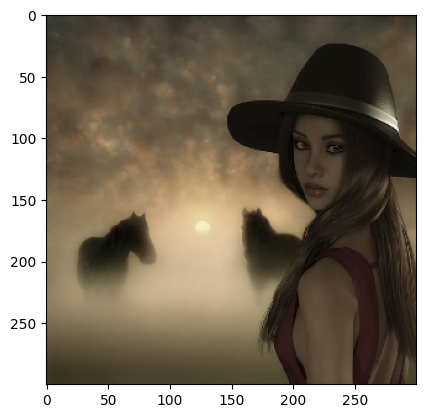

In [12]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  #path = '/content/' + fn
  img = load_img(fn, target_size=(300, 300))

  plt.imshow(img)
  x = img_to_array(img)
  print(len(x))
  print(x)
  x /= 255
  x = np.expand_dims(x, axis=0)
  print(type(x))
  print(x.shape)
  images = np.vstack([x])
  classes = m.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

In [13]:
print(train_generator)

1/1 [==============================] - 0s 116ms/step


<ipython-input-14-f6a448862881>:47: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


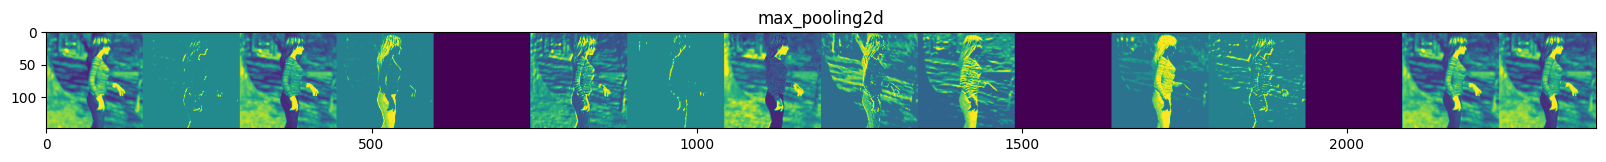

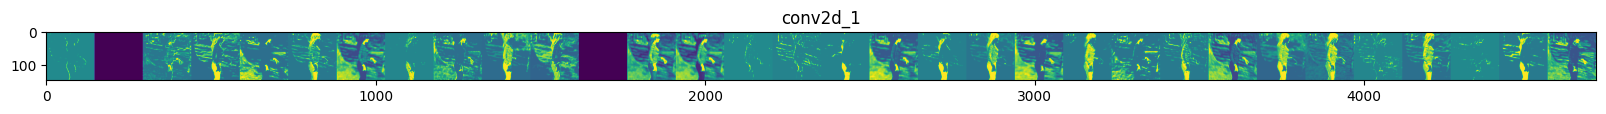

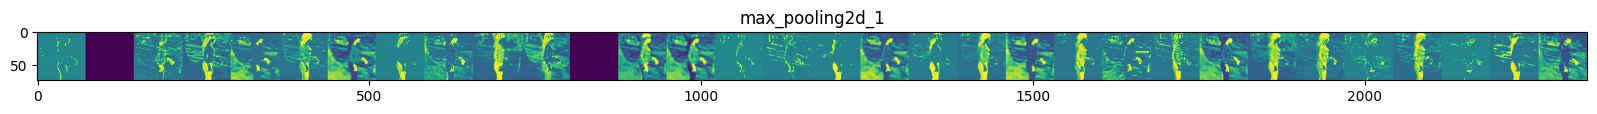

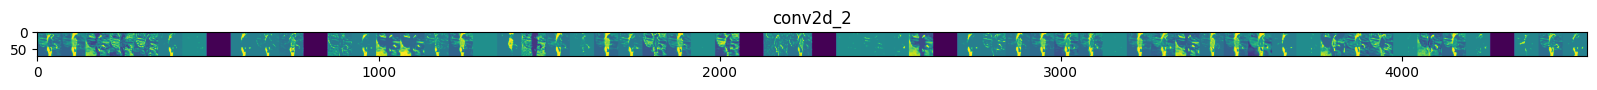

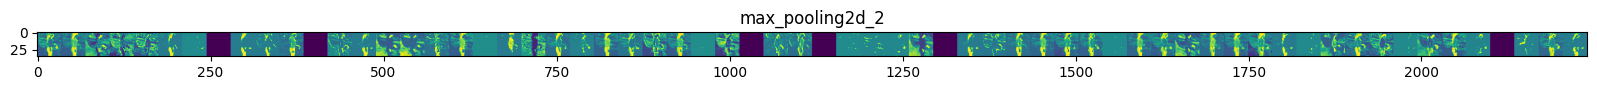

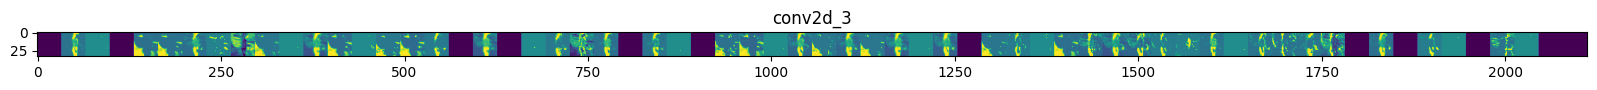

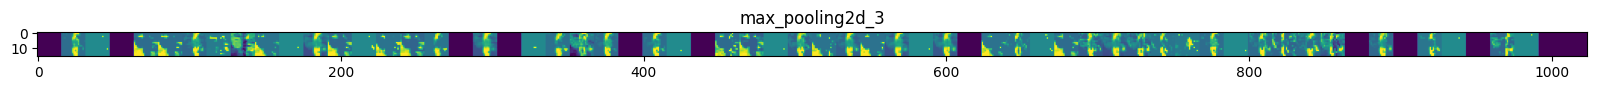

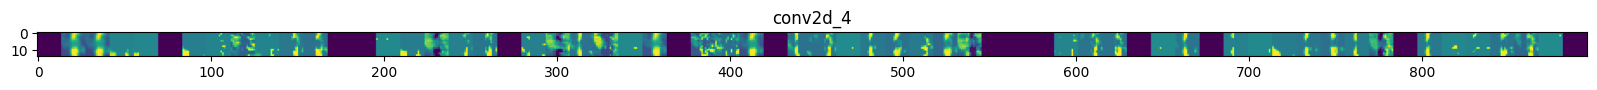

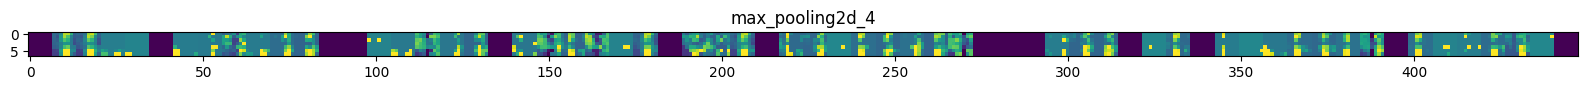

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in m.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = m.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in m.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

